# Linear Regression: E-Commerce

## Dataset
Dataset: [E-commerce Dataset](https://www.kaggle.com/datasets/kolawale/focusing-on-mobile-app-or-website)

The dataset contains information about customers who purchase clothing online from a store that provides in-store style and clothing advice sessions. Customers visit the store for sessions with a personal stylist, after which they have the option to order clothes via either a mobile app or website.

The company is currently deciding on where to concentrate their efforts: enhancing the mobile app experience or improving the website.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


## Get Data

In [2]:
customers = pd.read_csv("data/Ecommerce Customers")

In [3]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

How are the client's time spent on each platform related to the amount that they spend per year?

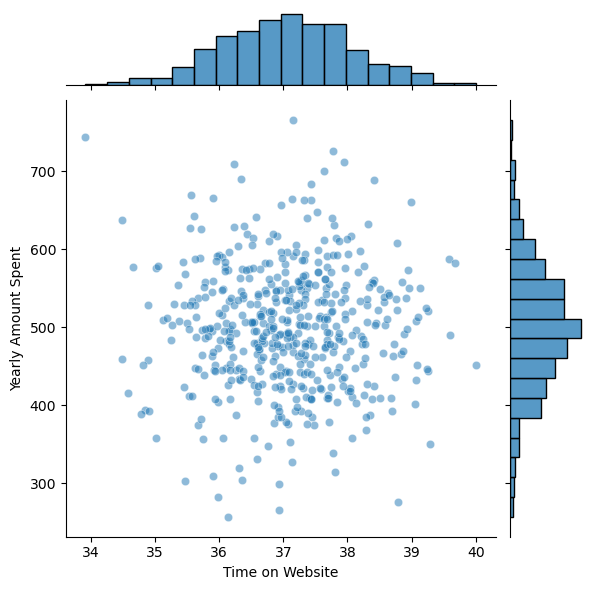

In [6]:
# Time on website vs yearly amount spend
sns.jointplot(data=customers, x="Time on Website", y="Yearly Amount Spent", alpha=0.5)

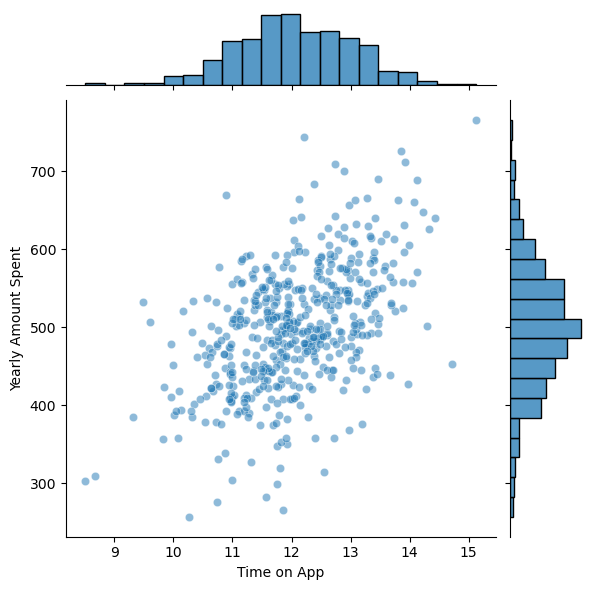

In [7]:
# Time on app vs yearly amount spent
sns.jointplot(data=customers, x="Time on App", y="Yearly Amount Spent", alpha=0.5)

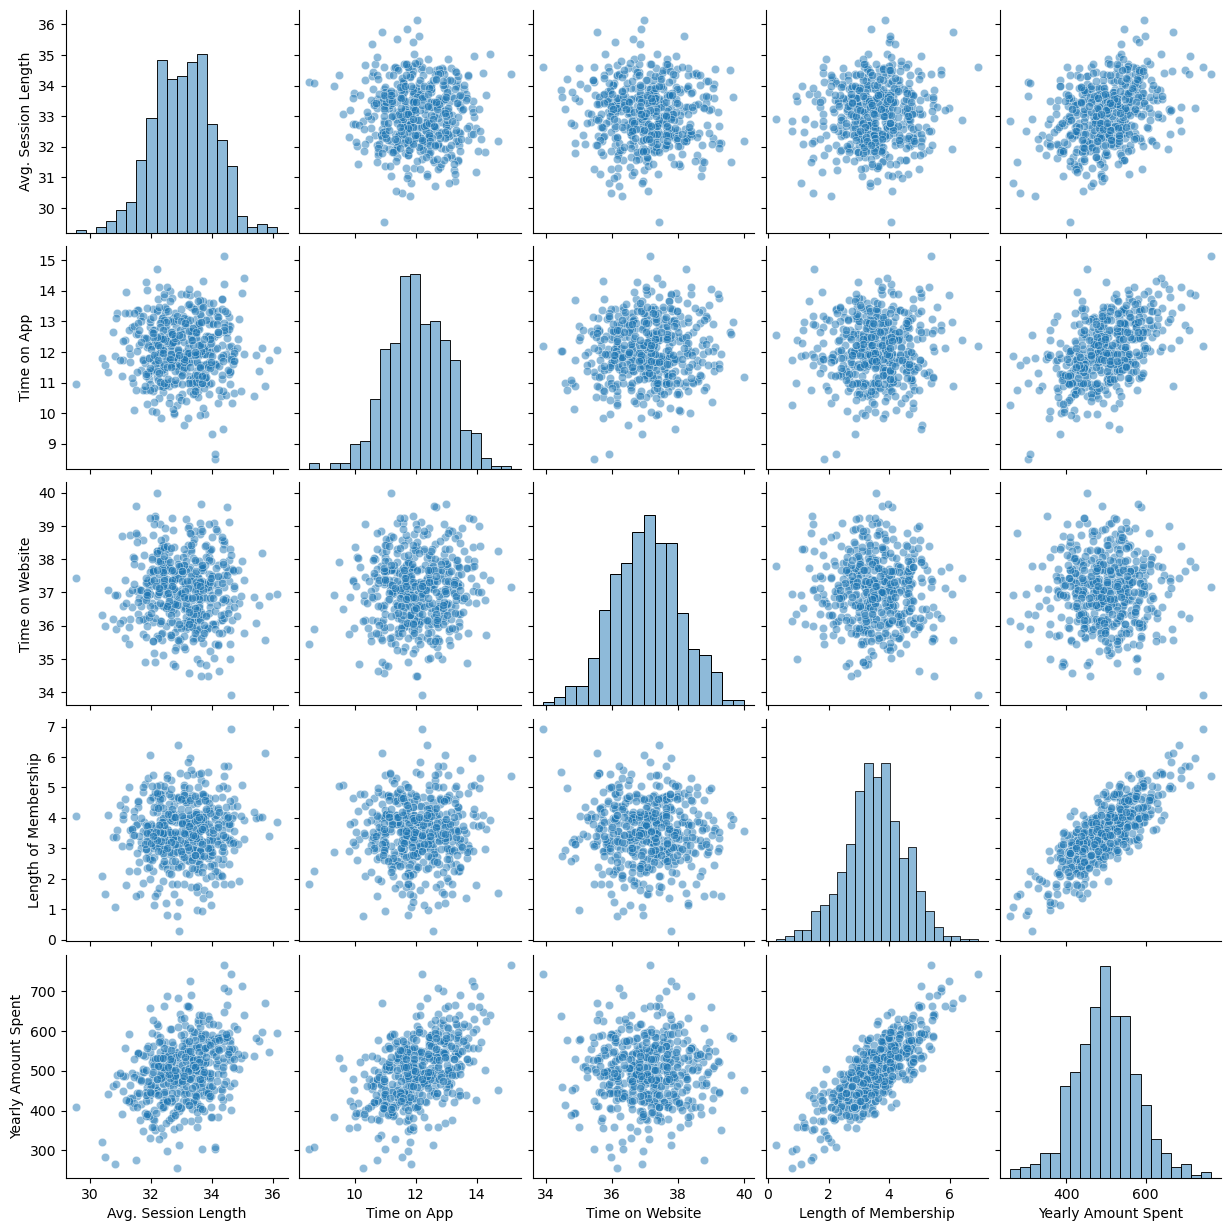

In [8]:
sns.pairplot(data=customers, kind="scatter", plot_kws={"alpha": 0.5}, diag_kws={"alpha":0.5})

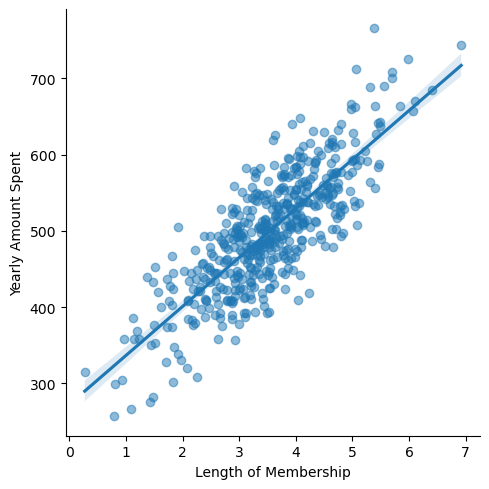

In [9]:
# Length of memebership vs yearly amount spent
sns.lmplot(data=customers, x="Length of Membership", y="Yearly Amount Spent", scatter_kws={"alpha": 0.5})

## Split Data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [12]:
X = customers[["Avg. Session Length", "Time on App", "Time on Website", "Length of Membership"]]
y = customers["Yearly Amount Spent"]

In [13]:
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [14]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Training Linear Regression Model

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lm = LinearRegression().fit(X_train, y_train)

In [18]:
# Coefficients
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [19]:
# R^2-Score
lm.score(X_train, y_train)

0.9854085989105928

In [20]:
# Coefficients saved in datafram
coef_df = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coef"])
print(coef_df)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


## Predict Test Data

In [21]:
pred = lm.predict(X_test)

Text(0, 0.5, 'Predicitons')

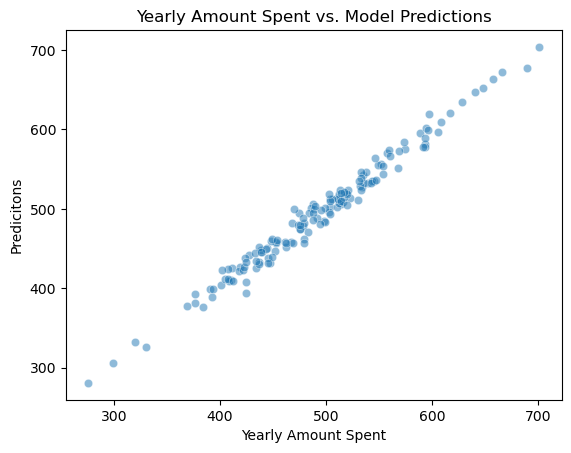

In [22]:
# Scatter plot: Actual values vs Predicted values
sns.scatterplot(x=y_test, y=pred, alpha=0.5)
plt.title("Yearly Amount Spent vs. Model Predictions")
plt.ylabel("Predicitons")

## Evaluate Model

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [24]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, pred)}")
print(f"Root Mean Squared Error: {mean_squared_error(y_test, pred, squared=False)}")

Mean Absolute Error: 8.42609164143211
Mean Squared Error: 103.9155413650334
Root Mean Squared Error: 10.193897260863158
